# Polynomial regression

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [12]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [13]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return

def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)

def store_results(df, model_name, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)

In [14]:
from sklearn.linear_model import LinearRegression

def run_model_poly(model, model_name, X_train, y_train, X_test, y_test, df):

    lr = LinearRegression()

    # Transform X into multiple columns
    X_train_poly = model.fit_transform(X_train)
    X_test_poly = model.transform(X_test)

    # Fit using linear regression
    lr.fit(X_train_poly, y_train)
    y_train_pred = lr.predict(X_train_poly)
    y_test_pred = lr.predict(X_test_poly)

    # Indices for sorting during plotting
    idx_train = np.argsort(X_train, axis=0).ravel()
    idx_test = np.argsort(X_test, axis=0).ravel()

    fig, ax = plt.subplots(
        1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
    )
    reg_plot(ax=ax[0], X=X_train[idx_train,:1], y=y_train[idx_train], y_pred=y_train_pred[idx_train], title="Train")
    reg_plot(
        ax=ax[1],
        X=X_test[idx_test,:1],
        y=y_test[idx_test],
        y_pred=y_test_pred[idx_test],
        title="test",
        color="limegreen",
    )
    fig.supxlabel("Lower status of the population [LSTAT]")
    fig.supylabel("Median value of homes in $1000s [MEDV]")

    fig, ax = plt.subplots(
        1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
    )
    res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
    res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
    fig.supxlabel("Predicted values")
    fig.supylabel("Residual")

    df = store_results(
        df=df,
        model_name=model_name,
        y_train=y_train,
        y_train_pred=y_train_pred,
        y_test=y_test,
        y_test_pred=y_test_pred,
    )

    return df

,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Poly-1,37.933978,39.817151,0.552478,0.521805
1,Poly-2,29.000487,33.602395,0.657870,0.596443
2,Poly-3,27.541105,32.091677,0.675087,0.614586
3,Poly-4,26.760597,29.843976,0.684295,0.641581
4,Poly-5,25.901907,29.847013,0.694425,0.641544
5,Poly-6,25.886222,29.548298,0.694610,0.645132
6,Poly-7,25.883990,29.671706,0.694636,0.643649
7,Poly-8,25.649690,31.823082,0.697401,0.617812
8,Poly-9,25.625912,30.521138,0.697681,0.633448
9,Poly-10,25.625350,35.068449,0.697688,0.578836


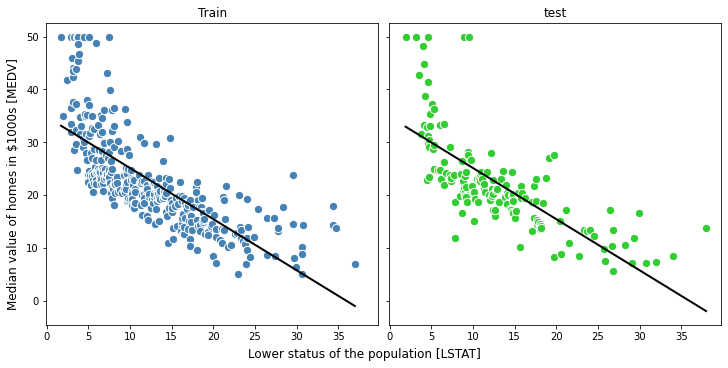

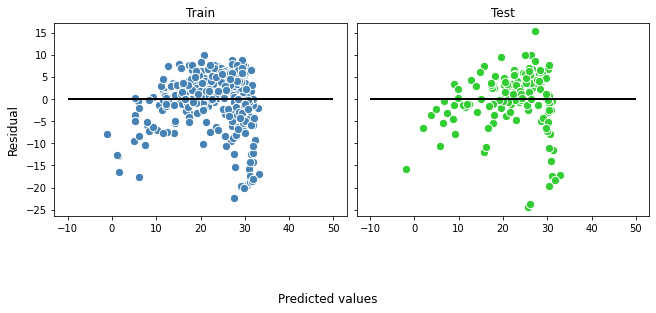

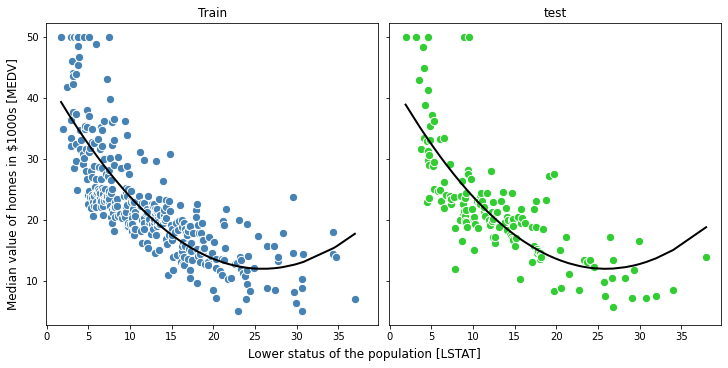

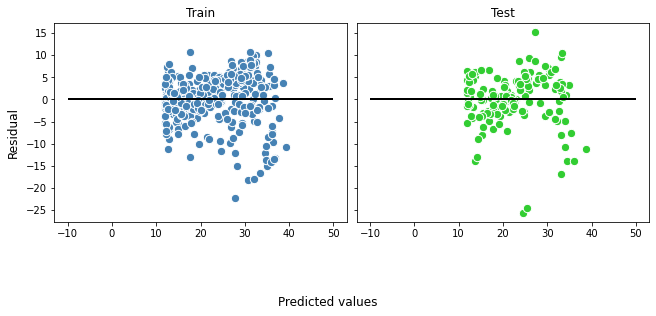

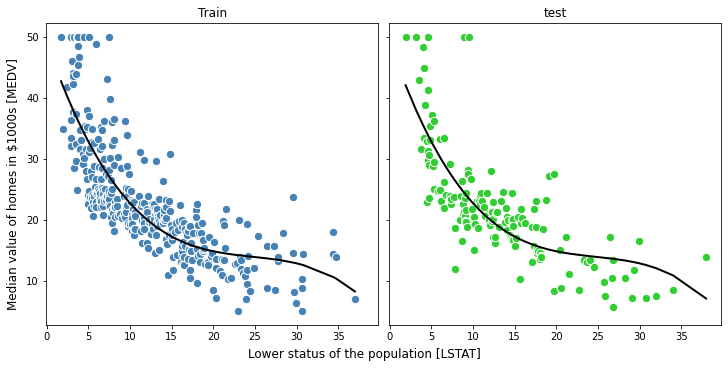

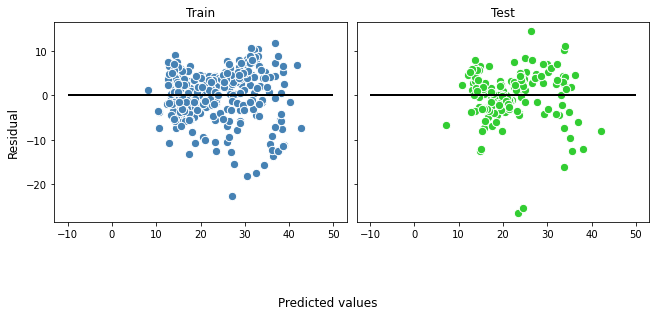

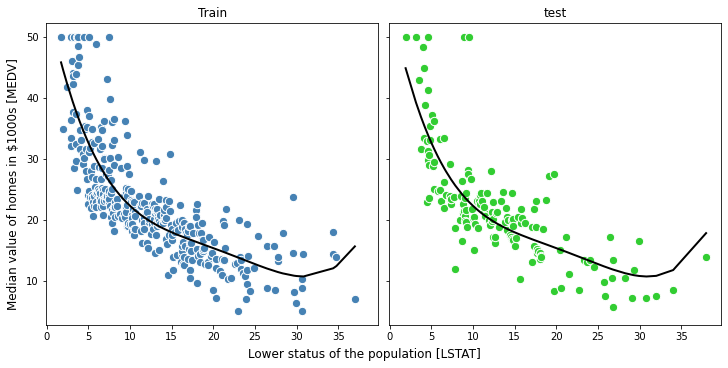

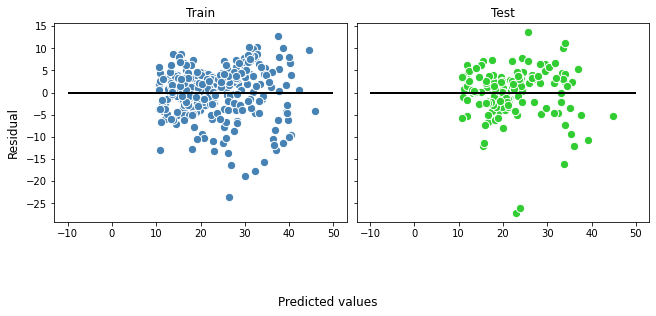

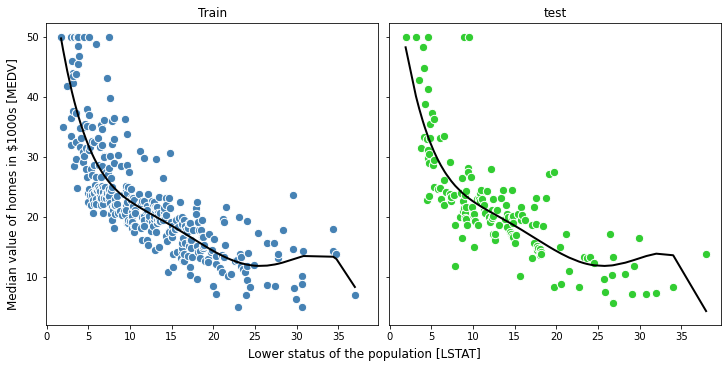

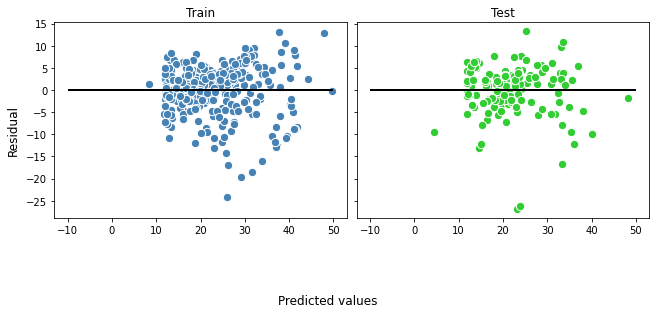

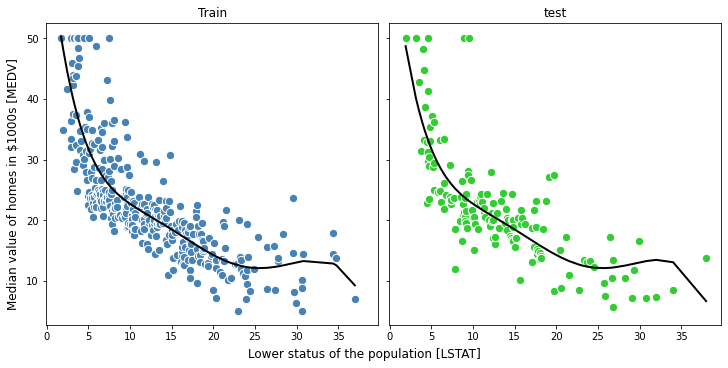

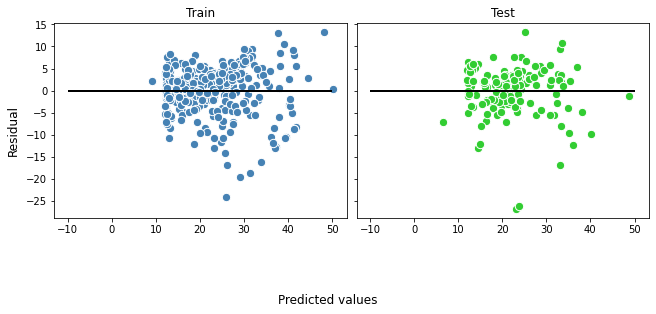

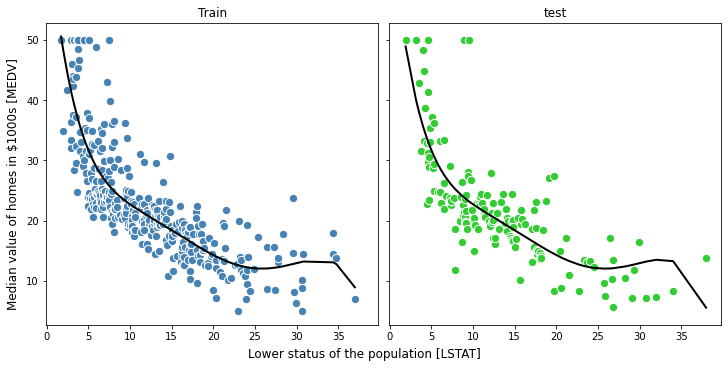

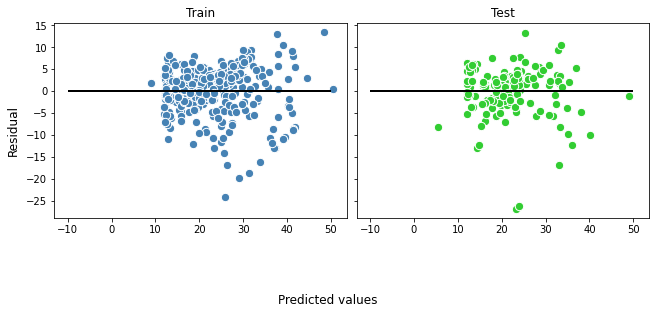

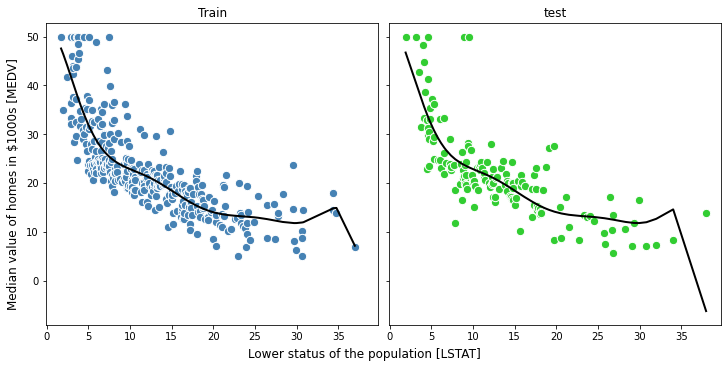

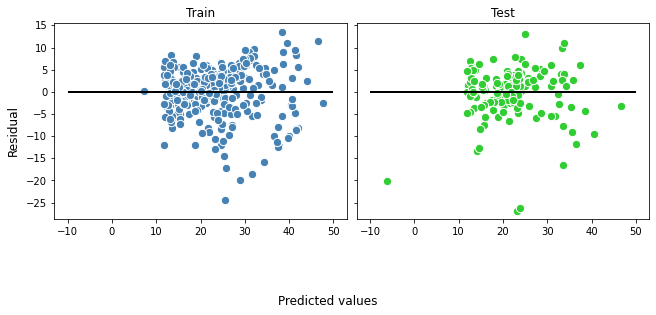

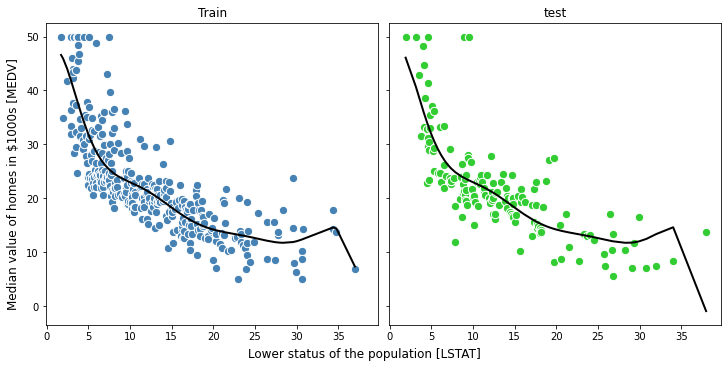

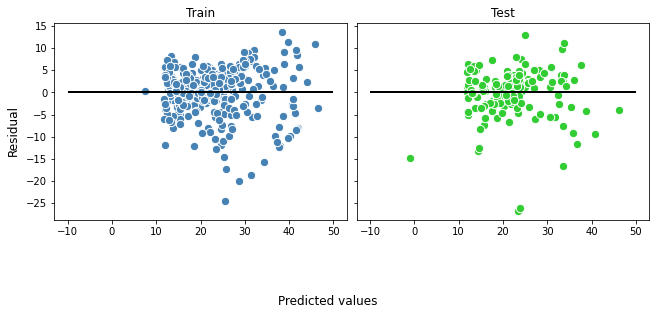

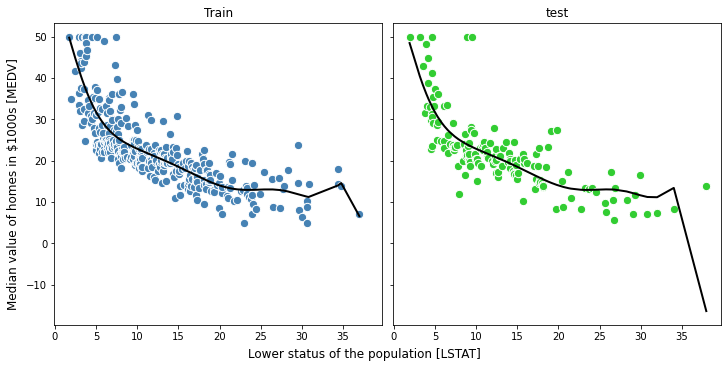

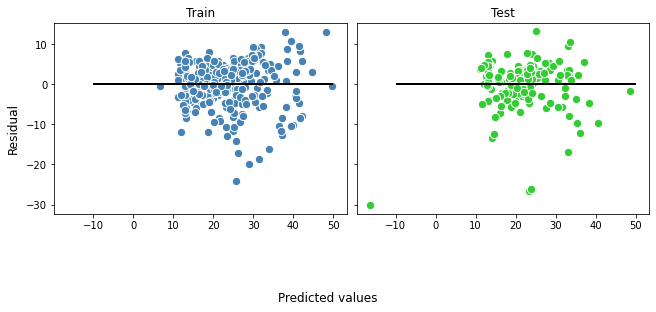

In [15]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

dfAll = pd.DataFrame()
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    dfAll = run_model_poly(
        model=poly,
        model_name=f"Poly-{degree}",
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)